In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
train=pd.read_csv('C:/Users/hp/Downloads/house-prices-advanced-regression-techniques/train.csv')
test=pd.read_csv('C:/Users/hp/Downloads/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train.shape    ,    test.shape

((1460, 81), (1459, 80))

In [4]:
sample_submission=pd.read_csv('C:/Users/hp/Downloads/house-prices-advanced-regression-techniques/sample_submission.csv')

In [5]:
sample_submission.shape

(1459, 2)

In [6]:
df_train=train.drop(['PoolQC','Fence','MiscFeature','Alley','Id'],axis=1)

In [7]:
df_test=test.drop(['PoolQC','Fence','MiscFeature','Alley','Id'],axis=1)

In [8]:
df_train['LotFrontage']=df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())
df_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())

In [9]:
df_train['BsmtCond']=df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_train['BsmtQual']=df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])
df_test['BsmtQual']=df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])
df_test['BsmtCond']=df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])

In [10]:
df_train['FireplaceQu']=df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode()[0])
df_test['FireplaceQu']=df_test['FireplaceQu'].fillna(df_test['FireplaceQu'].mode()[0])

In [11]:
df_train['GarageType']=df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])
df_test['GarageType']=df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])

In [12]:
df_train['GarageYrBlt']=df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mode()[0])
df_test['GarageYrBlt']=df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mode()[0])

In [13]:
df_train['GarageFinish']=df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])
df_test['GarageFinish']=df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])

In [14]:
df_train['GarageQual']=df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])
df_test['GarageQual']=df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])

In [15]:
df_train['GarageCond']=df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])
df_test['GarageCond']=df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])

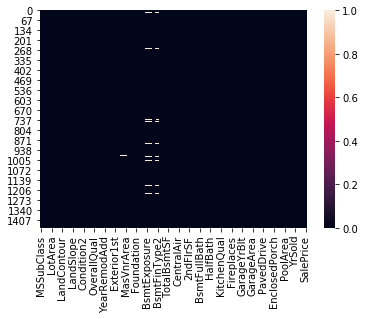

In [16]:
sns.heatmap(df_train.isnull())

In [17]:
df_train['MasVnrType']=df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])
df_train['BsmtExposure']=df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])
df_train['BsmtFinType1']=df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0])

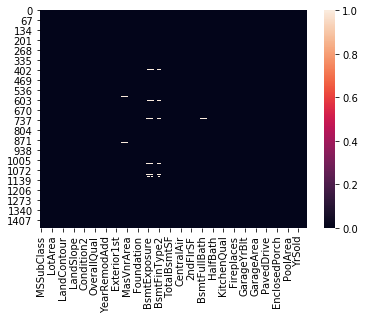

In [18]:
sns.heatmap(df_test.isnull())

In [19]:
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())
df_test['BsmtExposure']=df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])
df_test['BsmtFinType1']=df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])
df_test['BsmtFullBath']=df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].mode()[0])
df_test['BsmtFinType2']=df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])
df_test['MasVnrType']=df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])
df_test['BsmtHalfBath']=df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].mode()[0])

In [20]:
df_train.shape    ,    df_test.shape

((1460, 76), (1459, 75))

In [21]:
df_train=pd.get_dummies(df_train,drop_first=True)
df_test=pd.get_dummies(df_test,drop_first=True)

In [22]:
df_train.shape

(1460, 237)

In [23]:
df_test.shape

(1459, 220)

In [25]:
df=pd.concat([df_train,df_test],axis=0)

C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [26]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_Po,...,SaleType_WD,ScreenPorch,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,0,0,0,0,0,0,...,1,0,1,8,856.0,0.0,0,2003,2003,2008
1,1262,0,0,3,0,0,0,0,0,0,...,1,0,1,6,1262.0,0.0,298,1976,1976,2007
2,920,866,0,3,0,0,0,0,0,0,...,1,0,1,6,920.0,0.0,0,2001,2002,2008
3,961,756,0,3,0,0,0,0,1,0,...,1,0,1,7,756.0,0.0,0,1915,1970,2006
4,1145,1053,0,4,0,0,0,0,0,0,...,1,0,1,9,1145.0,0.0,192,2000,2000,2008


In [27]:
df=df.loc[:,~df_test.columns.duplicated()]

In [28]:
df.shape

(2919, 220)

In [29]:
df_train=df.iloc[:1460,:]
df_test=df.iloc[1460:,:]

In [30]:
df_train.shape    ,    df_test.shape

((1460, 220), (1459, 220))

In [31]:
df_test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\hp\Anaconda3\3.7\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [32]:
y_train=df_train['SalePrice']

In [33]:
x_train=df_train.drop(['SalePrice'],axis=1)

In [34]:
import xgboost

In [37]:
from xgboost import XGBRegressor

In [38]:
xgb=XGBRegressor()

In [39]:
xgb.fit(x_train,y_train)

C:\Users\hp\Anaconda3\3.7\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\hp\Anaconda3\3.7\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[12:30:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [41]:
xgb_pred=xgb.predict(df_test)

In [43]:
xgb.score(x_train,y_train)

0.9602026736042394

In [35]:
xgb=xgboost.XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=1500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [58]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators=[100,500,900,1100,1500]
max_depth=[2,3,5,10,15]
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# define the grid of hyperparameters to search

hyperparameter_grid={
    'n_estimators':n_estimators,
    'base_score':base_score,
    'booster':booster,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight
}

In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
random_cv=RandomizedSearchCV(estimator=xgb,
                            param_distributions=hyperparameter_grid,
                            cv=10,n_iter=500,
                            scoring='neg_mean_absolute_error',n_jobs=4,
                            verbose=5,
                            return_train_score=True,
                            random_state=42)

In [91]:
random_cv.fit(x_train,y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   43.3s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  7.5min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 21.4min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed: 35.3min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 52.8min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed: 64.9min
[Parallel(n_jobs=4)]: Done 874 tasks      | elapsed: 103.5min
[Parallel(n_jobs=4)]: Done 1144 tasks      | elapsed: 144.7min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed: 180.3min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 226.0min
[Parallel(n_jobs=4)]: Done 2170 tasks      | elapsed: 270.1min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed: 319.3min
[Parallel(n_jobs=4)]: Done 3034 tasks      | elapsed: 350.4min
[Parallel(n_jobs=4)]: Done 3520 tasks      | elapsed: 393.0min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed: 44

[18:24:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=1500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=500, n_jobs=4,
          param_distributions={'n_estimators': [100, 500, 900, 1100, 1500], 'base_score': [0.25, 0.5, 0.75, 1], 'booster': ['gbtree', 'gblinear'], 'max_depth': [2, 3, 5, 10, 15], 'learning_rate': [0.05, 0.1, 0.15, 0.2], 'min_child_weight': [1, 2, 3, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=5)

In [188]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [92]:
xgb.fit(x_train,y_train)

[18:24:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=1500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [93]:
xgb_pred=xgb.predict(df_test)

In [94]:
xgb.score(x_train,y_train)

0.9896839706909206

In [44]:
sample_submission['SalePrice']=xgb_pred

In [45]:
sample_submission.to_csv('C:/Users/hp/Downloads/house-prices-advanced-regression-techniques/sample_submission.csv',index=False)

In [46]:
import keras
from keras.models import Sequential
from keras.layers import Dense,LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.


In [47]:
from keras import backend as k
def root_mean_squared_error(df_true,df_pred):
    return k.sqrt(k.mean(k.square(df_pred-df_true)))

In [48]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 219))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error,optimizer='Adamax')


C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=219, units=50, kernel_initializer="he_uniform")`
  """


Instructions for updating:
Colocations handled automatically by placer.


C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=25, kernel_initializer="he_uniform")`
  
C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50, kernel_initializer="he_uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="he_uniform")`
  del sys.path[0]


In [ ]:
# Fitting the ANN to the Training set
model_history=classifier.fit(x_train, y_train,validation_split=0.20, batch_size = 10, epochs = 1000)

Train on 1168 samples, validate on 292 samples
Epoch 1/1000
1168/1168 [==============================] - 5s 4ms/step - loss: inf - val_loss: inf
Epoch 2/1000
1168/1168 [==============================] - 2s 1ms/step - loss: inf - val_loss: inf
Epoch 3/1000
1168/1168 [==============================] - 1s 469us/step - loss: inf - val_loss: inf
Epoch 4/1000
1168/1168 [==============================] - 1s 510us/step - loss: inf - val_loss: inf
Epoch 5/1000
1168/1168 [==============================] - 1s 452us/step - loss: inf - val_loss: inf
Epoch 6/1000
1168/1168 [==============================] - 1s 514us/step - loss: inf - val_loss: inf
Epoch 7/1000
1168/1168 [==============================] - 1s 456us/step - loss: inf - val_loss: inf
Epoch 8/1000
1168/1168 [==============================] - 1s 517us/step - loss: inf - val_loss: inf
Epoch 9/1000
1168/1168 [==============================] - 1s 442us/step - loss: inf - val_loss: inf
Epoch 10/1000
1168/1168 [==============================] 

C:\Users\hp\Anaconda3\3.7\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104027). Check your callbacks.
  % delta_t_median)


1168/1168 [==============================] - 2s 2ms/step - loss: inf - val_loss: inf
Epoch 72/1000
1168/1168 [==============================] - 1s 1ms/step - loss: inf - val_loss: inf
Epoch 73/1000
1168/1168 [==============================] - 1s 1ms/step - loss: inf - val_loss: inf
Epoch 74/1000
1168/1168 [==============================] - 1s 904us/step - loss: inf - val_loss: inf
Epoch 75/1000
1168/1168 [==============================] - 1s 1ms/step - loss: inf - val_loss: inf
Epoch 76/1000
1168/1168 [==============================] - 2s 1ms/step - loss: inf - val_loss: inf
Epoch 77/1000
1168/1168 [==============================] - 1s 1ms/step - loss: inf - val_loss: inf
Epoch 78/1000
1168/1168 [==============================] - 1s 939us/step - loss: inf - val_loss: inf
Epoch 79/1000
1168/1168 [==============================] - 1s 1ms/step - loss: inf - val_loss: inf
Epoch 80/1000
1168/1168 [==============================] - 1s 1ms/step - loss: inf - val_loss: inf
Epoch 81/1000
1168/1

1168/1168 [==============================] - 1s 469us/step - loss: inf - val_loss: inf
Epoch 152/1000
1168/1168 [==============================] - 0s 301us/step - loss: inf - val_loss: inf
Epoch 153/1000
1168/1168 [==============================] - 0s 240us/step - loss: inf - val_loss: inf
Epoch 154/1000
1168/1168 [==============================] - 0s 236us/step - loss: inf - val_loss: inf
Epoch 155/1000
1168/1168 [==============================] - 0s 264us/step - loss: inf - val_loss: inf
Epoch 156/1000
1168/1168 [==============================] - 0s 223us/step - loss: inf - val_loss: inf
Epoch 157/1000
1168/1168 [==============================] - 0s 264us/step - loss: inf - val_loss: inf
Epoch 158/1000
1168/1168 [==============================] - 0s 250us/step - loss: inf - val_loss: inf
Epoch 159/1000
1168/1168 [==============================] - 0s 277us/step - loss: inf - val_loss: inf
Epoch 160/1000
1168/1168 [==============================] - 0s 209us/step - loss: inf - val_loss:

1168/1168 [==============================] - 0s 386us/step - loss: inf - val_loss: inf
Epoch 232/1000
1168/1168 [==============================] - 0s 387us/step - loss: inf - val_loss: inf
Epoch 233/1000
1168/1168 [==============================] - 1s 437us/step - loss: inf - val_loss: inf
Epoch 234/1000
1168/1168 [==============================] - 0s 375us/step - loss: inf - val_loss: inf
Epoch 235/1000
1168/1168 [==============================] - 1s 434us/step - loss: inf - val_loss: inf
Epoch 236/1000
1168/1168 [==============================] - 0s 384us/step - loss: inf - val_loss: inf
Epoch 237/1000
1168/1168 [==============================] - 0s 363us/step - loss: inf - val_loss: inf
Epoch 238/1000
1168/1168 [==============================] - 0s 368us/step - loss: inf - val_loss: inf
Epoch 239/1000
1168/1168 [==============================] - 1s 885us/step - loss: inf - val_loss: inf
Epoch 240/1000
1168/1168 [==============================] - 3s 3ms/step - loss: inf - val_loss: i

In [87]:
classifier_pred=classifier.predict(df_test)

In [88]:
sample_submission['SalePrice']=classifier_pred

In [89]:
sample_submission.to_csv('C:/Users/hp/Downloads/house-prices-advanced-regression-techniques/sample_submission.csv',index=False)

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

In [ ]:
nn=MLPRegressor(hidden_layer_sizes=(100,100,100),activation='tanh',max_iter=20)

In [ ]:
nn.fit(x_train,y_train)

In [ ]:
nn_pred=nn.predict(x_test)